# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 70 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 30 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
tsa = pd.read_csv("tsa_claims_ujian.csv")

In [3]:
tsa.head(5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
tsa.tail(5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
tsa['Claim Type'].drop_duplicates().count()

8

In [8]:
columns = ['dataFeatures','dataType','null','nullPct','unique','unique Sample']

pd.DataFrame([tsa.columns,tsa.dtypes,tsa.isna().sum(),round(tsa.isna().sum()/len(tsa)*100,2),[tsa[i].drop_duplicates().count() for i in tsa.columns],[list(tsa[i].sample(2)) for i in tsa.columns]],index=columns).transpose()

,dataFeatures,dataType,null,nullPct,unique,unique Sample
0,Claim Number,object,0,0,51065,"[0305027L, 2015010519558]"
1,Date Received,object,70,0.14,3522,"[22-Aug-12, 20-Sep-10]"
2,Incident Date,object,570,1.12,10788,"[1/9/2008 0:00, 12/2/2007 0:00]"
3,Airport Code,object,2052,4.02,405,"[SFO, STL]"
4,Airport Name,object,2052,4.02,419,"[Washington Dulles International, Sacramento I..."
5,Airline Name,object,8555,16.75,243,"[-, Southwest Airlines ]"
6,Claim Type,object,1960,3.84,8,"[Property Damage, Passenger Property Loss]"
7,Claim Site,object,190,0.37,6,"[Checkpoint, Checked Baggage]"
8,Item,object,1012,1.98,1854,"[Other, Luggage (all types including footlocke..."
9,Claim Amount,object,992,1.94,13248,"[$157.00 , $1;275.00 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object

In [9]:
tsa.replace("-",np.nan,inplace=True)

In [10]:
tsa.tail(2)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51064,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN


Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [11]:
new = pd.read_csv('tsa_claims_ujian.csv')

In [12]:
new['Date Received'] = pd.to_datetime(new['Date Received'])

In [13]:
def incidentdate(x):
    try:
        pd.to_datetime(x)
        return np.nan
    except:
        return x
new['Incident Date'] = new['Incident Date'].apply(incidentdate)

In [14]:
new.dropna(subset=['Incident Date'],inplace=True)

For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [15]:
def incidentdate2(x):
    try:
        x['Incident Date'] = pd.to_datetime(x['Incident Date'])
        return x
    except:
        x['Incident Date'] = pd.to_datetime(x['Incident Date'][:7]+str(x['Date Received'].year))
        return x
new[['Date Received','Incident Date']] = new[['Date Received','Incident Date']].apply(incidentdate2,axis=1)

In [16]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])

In [17]:
tsa[['Date Received','Incident Date']] = tsa[['Date Received','Incident Date']].apply(incidentdate2,axis=1)

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [18]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [19]:
new

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [20]:
(tsa['Incident Date'].iloc[0] - tsa['Date Received'].iloc[0]).days

333

In [21]:
tsa['Day Differences'] = (tsa['Date Received'] - tsa['Incident Date']).apply(lambda x: x.days)

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

In [22]:
sns.set()

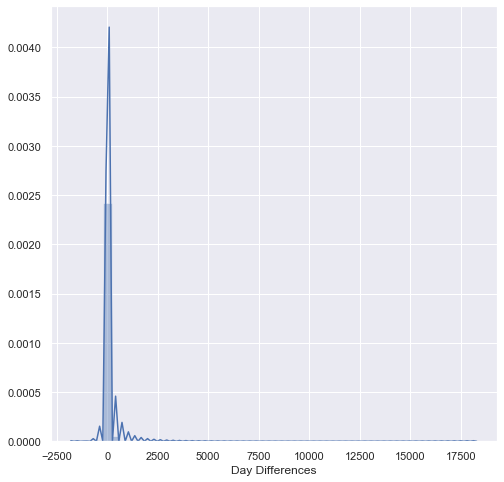

In [23]:
plt.figure(figsize=(8,8))
sns.distplot(tsa.dropna(subset=['Day Differences'])['Day Differences'])

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

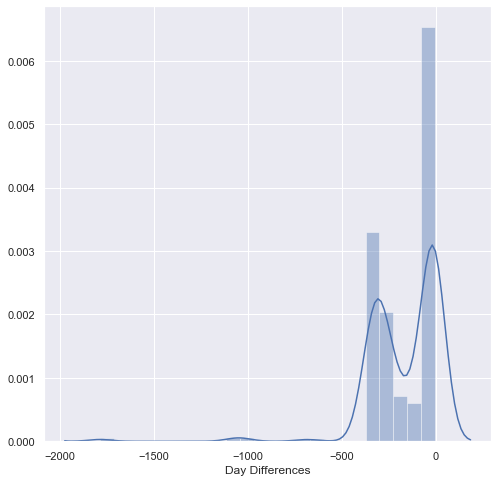

In [24]:
plt.figure(figsize=(8,8))
sns.distplot(tsa[(tsa['Day Differences']<0)]['Day Differences'])

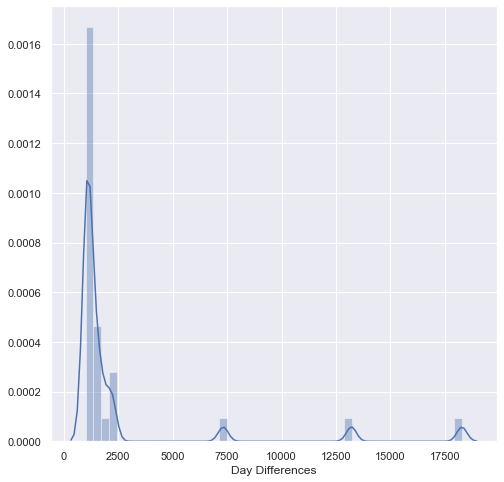

In [25]:
plt.figure(figsize=(8,8))
sns.distplot(tsa[(tsa['Day Differences']>1000)]['Day Differences'])

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

For day difference >1000. Sometimes, an incident would occur, and the victim would not have time during the following week or months to file a complaint to the TSA. Then they would forget about the incident altogether, until several years later they just remembered about the incident and decided to file a complaint. Or it could just be a typo/human error. Since there are only 30 cases under these conditions

For day difference < 0.It would be most likely that t

In [26]:
tsa[tsa['Day Differences']>1000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 5727 to 51042
Data columns (total 14 columns):
Claim Number       30 non-null object
Date Received      30 non-null datetime64[ns]
Incident Date      30 non-null datetime64[ns]
Airport Code       29 non-null object
Airport Name       29 non-null object
Airline Name       23 non-null object
Claim Type         28 non-null object
Claim Site         30 non-null object
Item               27 non-null object
Claim Amount       27 non-null object
Status             28 non-null object
Close Amount       27 non-null object
Disposition        23 non-null object
Day Differences    30 non-null float64
dtypes: datetime64[ns](2), float64(1), object(11)
memory usage: 3.5+ KB


In [27]:
tsa[(tsa['Day Differences']<0)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
12,0616624L,2002-09-30,2003-08-21 00:00:00,NaN,NaN,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$128.05,Denied,$0.00,Deny,-325.0
113,0616756L,2002-12-03,2003-02-04 00:00:00,JAX,Jacksonville International,NaN,Passenger Property Loss,Checkpoint,Other,$120.00,Approved,$120.00,Approve in Full,-63.0
343,0114002M,2003-01-14,2003-12-20 00:00:00,LAX,Los Angeles International Airport,American Airlines,NaN,Checked Baggage,Jewelry - Fine,$1;254.83,Denied,$0.00,Deny,-340.0
350,0115048M,2003-01-15,2003-10-08 00:00:00,JAX,Jacksonville International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$49.99,Approved,$49.99,Approve in Full,-266.0
354,0115031M,2003-01-15,2003-09-07 00:00:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$262.50,Settled,$131.25,Settle,-235.0
494,0129008M,2003-01-29,2003-12-02 00:00:00,MIA,Miami International Airport,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$206.39,Denied,$0.00,Deny,-307.0
512,0616806L,2003-01-30,2003-08-09 00:00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,$36.65,Denied,$0.00,Deny,-191.0
606,0211060L,2003-02-11,2003-11-27 00:00:00,PDX,Portland International,NaN,Property Damage,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,$60.00,Settled,$30.00,Settle,-289.0
620,0212048L,2003-02-12,2003-12-23 00:00:00,GEG,Spokane International,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$90.95,Approved,$90.95,Approve in Full,-314.0


In [28]:
len(tsa[(tsa['Day Differences']>1000)])

30

In [29]:
print(len(tsa[(tsa['Day Differences']<0) & (tsa['Disposition']=='Deny')]))
print(len(tsa[(tsa['Day Differences']<0) & (tsa['Disposition']=='Settle')]))
print(len(tsa[(tsa['Day Differences']<0) & (tsa['Disposition']=='Approve in Full')]))

191
73
90


In [30]:
print(len(tsa[(tsa['Day Differences']>1000) & (tsa['Disposition']=='Deny')]))
print(len(tsa[(tsa['Day Differences']>1000) & (tsa['Disposition']=='Settle')]))
print(len(tsa[(tsa['Day Differences']>1000) & (tsa['Disposition']=='Approve in Full')]))

12
3
8


Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [31]:
tsa['Claim Amount'] = tsa['Claim Amount'].str.replace('$', '')
tsa['Close Amount'] = tsa['Close Amount'].str.replace('$', '')
tsa['Claim Amount'] = tsa['Claim Amount'].str.replace(';', '')
tsa['Close Amount'] = tsa['Close Amount'].str.replace(';', '')
tsa['Claim Amount'] = tsa['Claim Amount'].astype(float)
tsa['Close Amount'] = tsa['Close Amount'].astype(float)


Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [32]:
tsa['Amount Differences'] = tsa['Claim Amount'] - tsa['Close Amount'] 

In [33]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [34]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

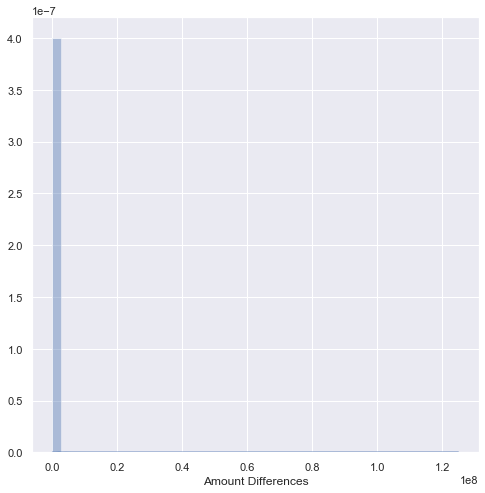

In [35]:
plt.figure(figsize=(8,8))
sns.distplot(tsa.dropna(subset=['Amount Differences'])['Amount Differences'])

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [36]:
tsa['Day Differences'].describe()

count    50460.000000
mean        41.768173
std        131.353407
min      -1789.000000
25%         12.000000
50%         23.000000
75%         45.000000
max      18279.000000
Name: Day Differences, dtype: float64

In [37]:
IQR = tsa['Amount Differences'].describe()['75%']-tsa['Amount Differences'].describe()['25%']
LQ = tsa['Amount Differences'].describe()['25%']
UQ = tsa['Amount Differences'].describe()['75%']
LOutlier = LQ - 1.5*IQR
UOutlier = UQ + 1.5*IQR
tsa[(tsa['Amount Differences']<LOutlier) | (tsa['Amount Differences']>UOutlier)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
55,19809,2002-11-13,2002-10-21 00:00:00,SMF,Sacramento International Airport,Southwest Airlines,NaN,Other,Computer - Laptop,3500.00,Denied,0.00,Deny,23.0,3500.00
60,21173,2002-11-14,2002-10-19 00:00:00,LAS,McCarran International,Southwest Airlines,NaN,Other,Other,1600.00,Denied,0.00,Deny,26.0,1600.00
87,18808,2002-11-20,2002-09-24 00:00:00,CLT,Charlotte/Douglas International Airport,USAir,NaN,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,3800.00,Settled,1416.41,Settle,57.0,2383.59
108,21015,2002-11-29,2002-11-13 00:00:00,LAS,McCarran International,Continental Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),6111.59,Denied,0.00,Deny,16.0,6111.59
149,23124,2002-12-11,2002-11-03 00:00:00,CHS,Charleston International,USAir,Passenger Property Loss,Other,Jewelry - Fine,11500.00,Canceled,0.00,NaN,38.0,11500.00


In [38]:
tsa[(tsa['Amount Differences']<LOutlier) | (tsa['Amount Differences']>UOutlier)]['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [39]:
tsa[(tsa['Amount Differences']<LOutlier) | (tsa['Amount Differences']>UOutlier)]['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption? why? Try to explain it with the data 

In [40]:
for i in tsa[(tsa['Amount Differences']>UOutlier)]['Status'].unique():
    print("{}: {}".format(i,len(tsa[((tsa['Amount Differences']>UOutlier)) & (tsa['Status']==i)])))
    

Canceled: 178
Denied: 3450
Settled: 413
Closed as a contractor claim: 60
Approved: 2


In [41]:
178+3450+60

3688

In [42]:
413+2

415

In [43]:
415/(3688+415)*100

10.11455032902754

As you can see from the above, the amount of request that is declined or canceled is 3688, while the approved or settled requests is just a total of 415. This means that only 10.11% of the complains with extreme value of big differences is not even valid complaint in the first place. In my opinion, the reason resulting this is beacuse the people tried to make a small fortune by scamming the TSA, complainning about an incident but in actuality it is thier own fault.

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [44]:
tsa.groupby('Airline Name').count()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
Airline Name,,,,,,,,,,,,,,
ATA Aerocondor,110,110,110,110,110,109,108,109,108,110,104,101,110,104
Aer Lingus,26,26,26,25,25,26,26,26,21,21,16,16,26,16
Aero California,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Aero Flot,14,14,14,14,14,14,14,13,8,8,2,2,14,2
Aero Mexico,41,41,41,41,41,40,41,37,37,38,21,18,41,21
Aeroflot Russian International,6,6,6,6,6,6,6,6,4,4,0,0,6,0
Aerolineas Argentinas,12,12,12,12,12,12,12,12,10,10,3,3,12,3
Aeromar,1,1,1,1,1,1,1,0,1,1,1,1,1,1
Aerosvit Airlines,1,1,1,1,1,1,1,1,1,1,0,0,1,0


<Figure size 864x7200 with 0 Axes>

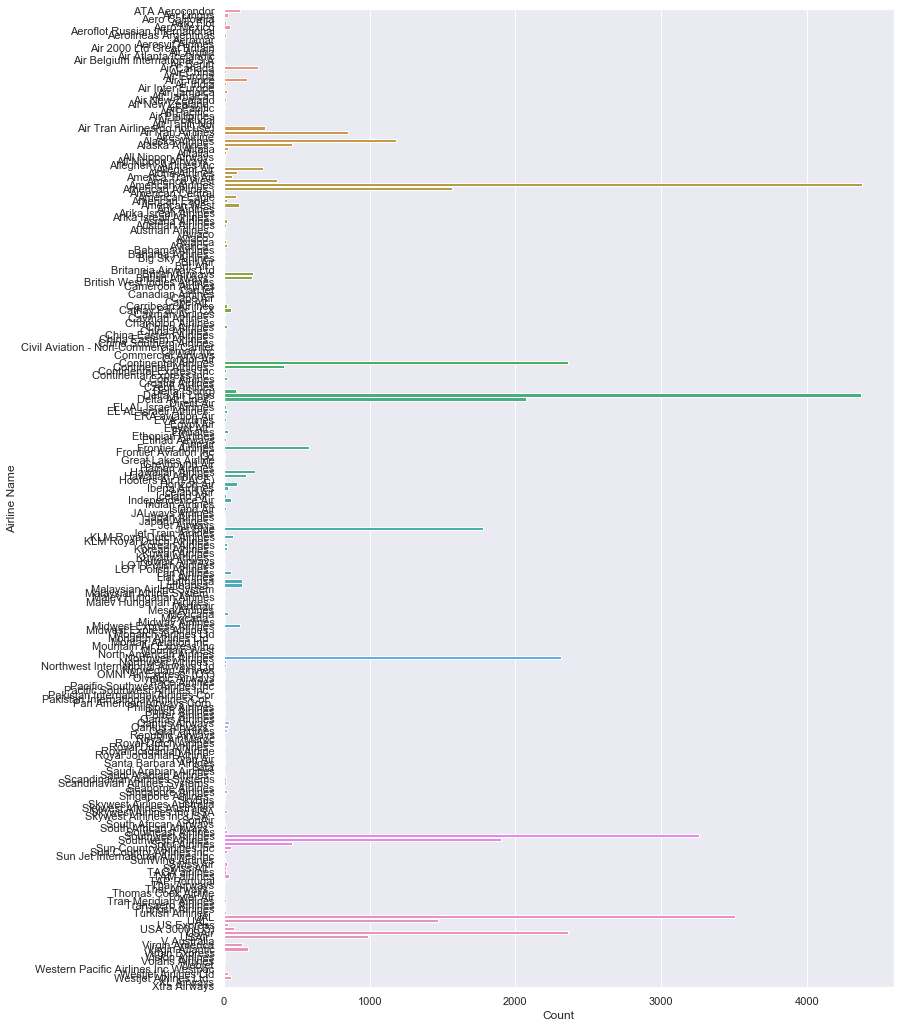

In [45]:
plt.figure(figsize=(12,100))

data = pd.DataFrame({'Airline Name':list((tsa.groupby('Airline Name').count()).index),'Count':list((tsa.groupby('Airline Name').count())['Claim Number'])})
plt.figure(figsize=(12,18))
sns.barplot(data=data,y='Airline Name',x='Count',orient='h')


The graph above proves that there is a relationsship between airlines and number of conplaints. There are certain airlines that have an extremely high number of complaints, these airlines are either probably very crowded, therefore even though the number of complaints is high, but the proportion of complain count to total number of passengers could be low. Or the airline has a horrible staff management. 

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

<Figure size 864x7200 with 0 Axes>

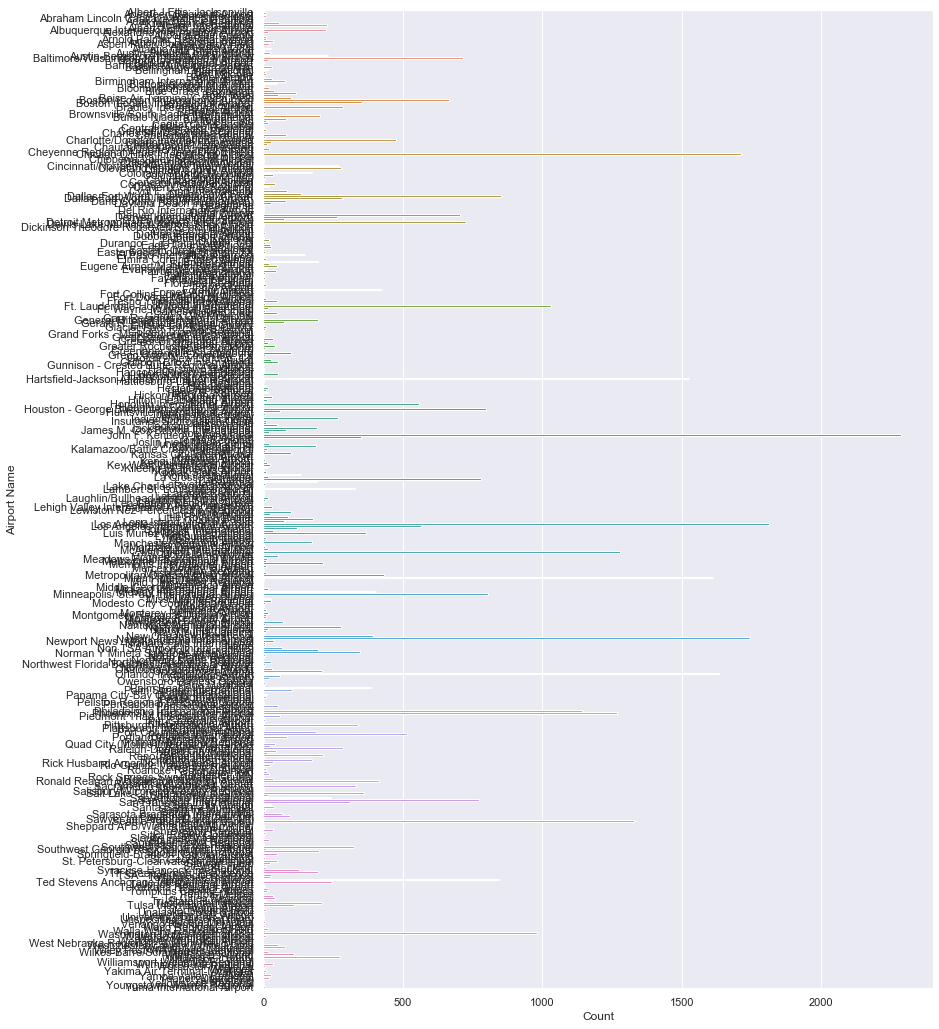

In [46]:
plt.figure(figsize=(12,100))

data = pd.DataFrame({'Airport Name':list((tsa.groupby('Airport Name').count()).index),'Count':list((tsa.groupby('Airport Name').count())['Claim Number'])})
plt.figure(figsize=(12,18))
sns.barplot(data=data,y='Airport Name',x='Count',orient='h')
plt.tight_layout

The bar graph relatng the airport to the number of complaint counts is simillar to the bar graph of the airline vs complaint count. This mean that there is a realtionship between airport and number of complaints in those specific airports, but not as much as the airline graph since the airport graph is relatively more evenly distributed.

In [47]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [48]:
(tsa[pd.isna(tsa['Claim Type'])]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 2 to 51059
Data columns (total 15 columns):
Claim Number          2031 non-null object
Date Received         1996 non-null datetime64[ns]
Incident Date         1649 non-null datetime64[ns]
Airport Code          1484 non-null object
Airport Name          1484 non-null object
Airline Name          1028 non-null object
Claim Type            0 non-null object
Claim Site            1901 non-null object
Item                  1877 non-null object
Claim Amount          1558 non-null float64
Status                1979 non-null object
Close Amount          1535 non-null float64
Disposition           1460 non-null object
Day Differences       1647 non-null float64
Amount Differences    1343 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 253.9+ KB


In [49]:
tsa['Claim Type'].unique()

array(['Property Damage', nan, 'Passenger Property Loss',
       'Personal Injury', 'Passenger Theft', 'Employee Loss (MPCECA)',
       'Motor Vehicle', 'Complaint'], dtype=object)

## There are NaN values in the claim type column, is beacuse the reason why the person complain in the first place might be due to a special nature. There are only 7 unique category when filing a TSA complaint, and not all complaints might fall under those categories. 

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [50]:
tsa['Disposition'].unique()

array(['Approve in Full', nan, 'Deny', 'Settle'], dtype=object)

In [51]:
tsa['Status'].unique()

array(['Approved', 'Canceled', 'Denied', 'Settled', 'In litigation',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'Closed as a contractor claim', 'In review', 'Claim entered',
       'Deny', nan, 'Settle', 'Approve in Full'], dtype=object)

In [52]:
len(tsa['Disposition'].unique())

4

In [53]:
len(tsa['Status'].unique())

13

In [54]:
data2 = pd.DataFrame(data=[list(tsa['Disposition']),list(tsa['Status'])],index=['Disposition','Status']).transpose()
data2['Disposition']=data2['Disposition'].astype('category').cat.codes
data2['Status']=data2['Status'].astype('category').cat.codes


In [55]:
data2.corr()

,Disposition,Status
Disposition,1.000000,0.541111
Status,0.541111,1.000000


In [56]:
new3 = tsa.dropna(subset=['Status','Disposition'])
for i in new3['Status'].unique():
    statlist=new3[new3['Status']==i]['Disposition'].unique()
    print("Status: {}, Disposition: ".format(i),end="")
    for j in statlist:
        print("{}, ".format(j),end="")
    print()
        
    

Status: Approved, Disposition: Approve in Full, 
Status: Denied, Disposition: Deny, 
Status: Settled, Disposition: Settle, 
Status: In litigation, Disposition: Deny, Approve in Full, 
Status: Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date., Disposition: Deny, Approve in Full, 
Status: In review, Disposition: Deny, 
Status: Canceled, Disposition: Deny, Approve in Full, Settle, 


## There are 4 different values for dispoition and 13 different values for statuses. By changing them into categorical codes i can initially see that there is a correlation between these two columns. But if we drop

In [57]:
for i in tsa['Claim Type'].dropna().unique():
    print(i)

Property Damage
Passenger Property Loss
Personal Injury
Passenger Theft
Employee Loss (MPCECA)
Motor Vehicle
Complaint


In [58]:
[tsa.groupby('Claim Type').mean()['Claim Amount'][i] for i in tsa['Claim Type'].dropna().unique()]

[393.7529016440851,
 686.3698639281969,
 634167.9298939932,
 618.2873913043478,
 542.0269444444444,
 1721.8998571428574,
 57.15]

In [59]:
tsa.groupby('Claim Type').mean()['Claim Amount']

Claim Type
Complaint                      57.150000
Employee Loss (MPCECA)        542.026944
Motor Vehicle                1721.899857
Passenger Property Loss       686.369864
Passenger Theft               618.287391
Personal Injury            634167.929894
Property Damage               393.752902
Name: Claim Amount, dtype: float64

In [60]:
tsa.to_csv('file1.csv')

# Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [66]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


In [63]:
tsa_original = pd.read_csv("tsa_claims_ujian.csv")

In [89]:
IQR = tsa['Amount Differences'].describe()['75%']-tsa['Amount Differences'].describe()['25%']
LQ = tsa['Amount Differences'].describe()['25%']
UQ = tsa['Amount Differences'].describe()['75%']
LOutlier = LQ - 1.5*IQR
UOutlier = UQ + 1.5*IQR
tsa_clean = tsa[(tsa['Amount Differences']>LOutlier) & (tsa['Amount Differences']<UOutlier)]

In [91]:
IQR = tsa_clean['Day Differences'].describe()['75%']-tsa_clean['Day Differences'].describe()['25%']
LQ = tsa_clean['Day Differences'].describe()['25%']
UQ = tsa_clean['Day Differences'].describe()['75%']
LOutlier = LQ - 1.5*IQR
UOutlier = UQ + 1.5*IQR
tsa_clean = tsa_clean[(tsa_clean['Day Differences']>LOutlier) & (tsa_clean['Day Differences']<UOutlier)]

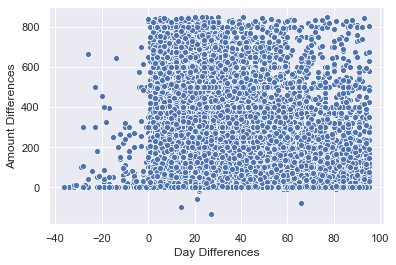

In [94]:
sns.scatterplot(data=tsa_clean,x='Day Differences',y='Amount Differences')

In [95]:
IQR = tsa['Close Amount'].describe()['75%']-tsa['Close Amount'].describe()['25%']
LQ = tsa['Close Amount'].describe()['25%']
UQ = tsa['Close Amount'].describe()['75%']
LOutlier = LQ - 1.5*IQR
UOutlier = UQ + 1.5*IQR
tsa_clean = tsa[(tsa['Close Amount']>LOutlier) & (tsa['Close Amount']<UOutlier)]

In [96]:
IQR = tsa_clean['Day Differences'].describe()['75%']-tsa_clean['Day Differences'].describe()['25%']
LQ = tsa_clean['Day Differences'].describe()['25%']
UQ = tsa_clean['Day Differences'].describe()['75%']
LOutlier = LQ - 1.5*IQR
UOutlier = UQ + 1.5*IQR
tsa_clean = tsa_clean[(tsa_clean['Day Differences']>LOutlier) & (tsa_clean['Day Differences']<UOutlier)]

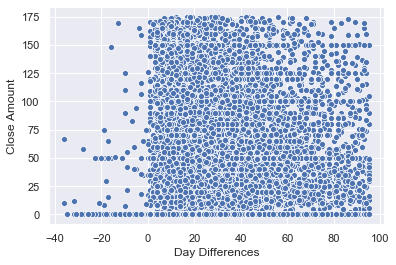

In [97]:
sns.scatterplot(data=tsa_clean,x='Day Differences',y='Close Amount')

In [104]:
IQR = tsa['Claim Amount'].describe()['75%']-tsa['Claim Amount'].describe()['25%']
LQ = tsa['Claim Amount'].describe()['25%']
UQ = tsa['Claim Amount'].describe()['75%']
LOutlier = LQ - 1.5*IQR
UOutlier = UQ + 1.5*IQR
tsa_clean = tsa[(tsa['Claim Amount']>LOutlier) & (tsa['Claim Amount']<UOutlier)]

In [105]:
IQR = tsa_clean['Day Differences'].describe()['75%']-tsa_clean['Day Differences'].describe()['25%']
LQ = tsa_clean['Day Differences'].describe()['25%']
UQ = tsa_clean['Day Differences'].describe()['75%']
LOutlier = LQ - 1.5*IQR
UOutlier = UQ + 1.5*IQR
tsa_clean = tsa_clean[(tsa_clean['Day Differences']>LOutlier) & (tsa_clean['Day Differences']<UOutlier)]

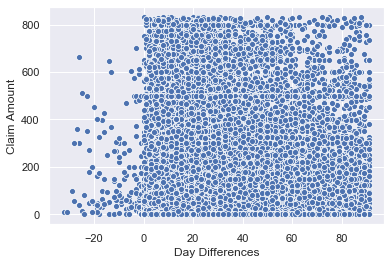

In [106]:
sns.scatterplot(data=tsa_clean,x='Day Differences',y='Claim Amount')

In [107]:
IQR = tsa['Claim Amount'].describe()['75%']-tsa['Claim Amount'].describe()['25%']
LQ = tsa['Claim Amount'].describe()['25%']
UQ = tsa['Claim Amount'].describe()['75%']
LOutlier = LQ - 1.5*IQR
UOutlier = UQ + 1.5*IQR
tsa_clean = tsa[(tsa['Claim Amount']>LOutlier) & (tsa['Claim Amount']<UOutlier)]

In [108]:
IQR = tsa_clean['Close Amount'].describe()['75%']-tsa_clean['Close Amount'].describe()['25%']
LQ = tsa_clean['Close Amount'].describe()['25%']
UQ = tsa_clean['Close Amount'].describe()['75%']
LOutlier = LQ - 1.5*IQR
UOutlier = UQ + 1.5*IQR
tsa_clean = tsa_clean[(tsa_clean['Close Amount']>LOutlier) & (tsa_clean['Close Amount']<UOutlier)]

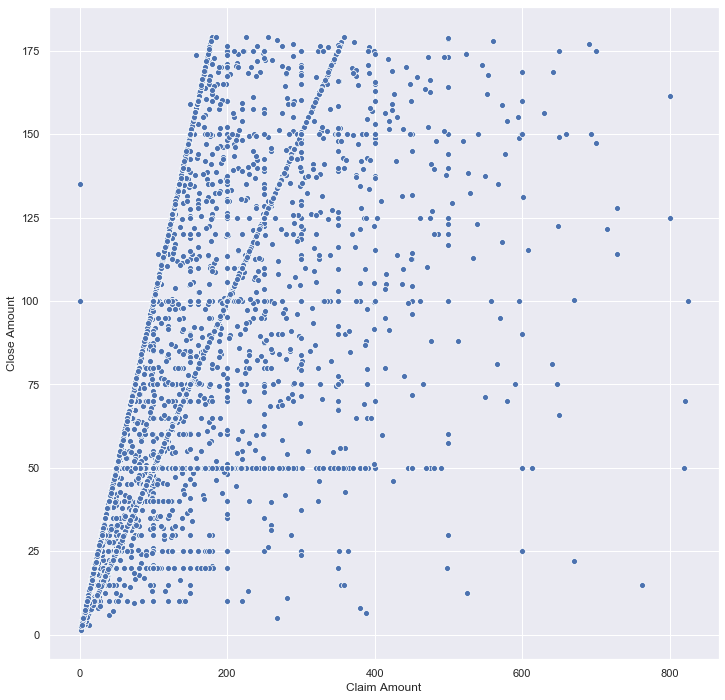

In [176]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=tsa_clean[tsa_clean['Close Amount']!=0],x='Claim Amount',y='Close Amount')

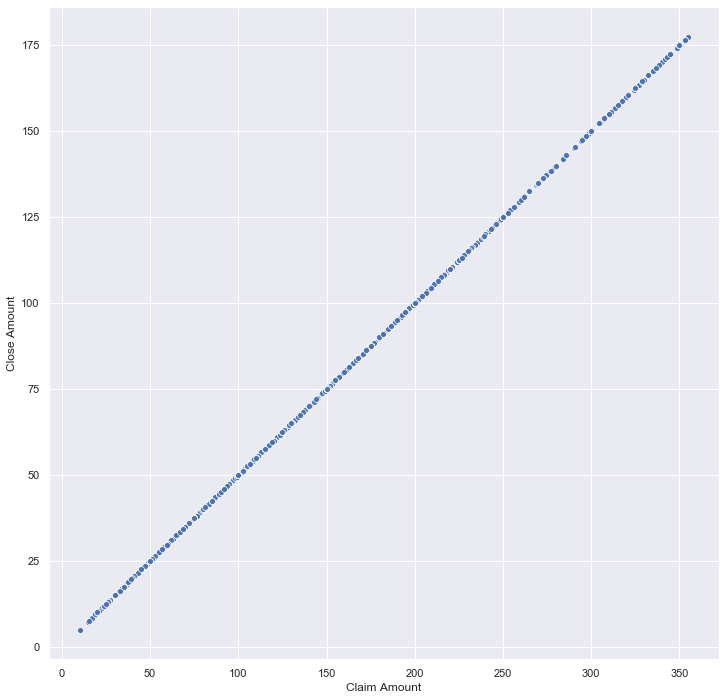

In [221]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=tsa_clean[(tsa_clean['Claim Amount']/tsa_clean['Close Amount'])==2],x='Claim Amount',y='Close Amount')


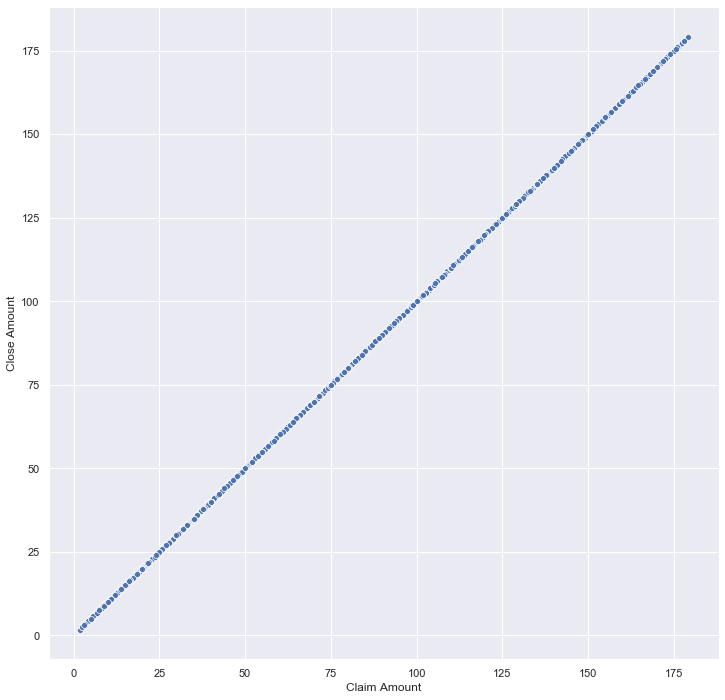

In [222]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=tsa_clean[(tsa_clean['Claim Amount']/tsa_clean['Close Amount'])==1],x='Claim Amount',y='Close Amount')


In [229]:
tsa.head(1)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.0,Approved,50.0,Approve in Full,-333.0,0.0


In [230]:
tsa_clean[tsa_clean['Claim Amount']/tsa_clean['Close Amount']==2].groupby('Claim Type').count().sort_values(by='Claim Number',ascending=False)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
Claim Type,,,,,,,,,,,,,,
Passenger Property Loss,1102,1101,1098,1041,1041,828,1101,1093,1102,1102,1102,1102,1097,1102
Property Damage,585,581,585,532,532,369,585,583,585,585,585,585,581,585
Employee Loss (MPCECA),12,12,12,12,12,8,12,12,12,12,12,12,12,12
Passenger Theft,5,5,5,5,5,5,5,5,5,5,5,5,5,5


## The scatter plot shows 2 linear relationship between the claim and close amount, one is which they approved the original claim amount, and the second they decided to settle for half of the claim amount

In [114]:
tsa[tsa['Close Amount']==50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 36165
Data columns (total 15 columns):
Claim Number          1152 non-null object
Date Received         1151 non-null datetime64[ns]
Incident Date         1146 non-null datetime64[ns]
Airport Code          1104 non-null object
Airport Name          1104 non-null object
Airline Name          770 non-null object
Claim Type            1110 non-null object
Claim Site            1149 non-null object
Item                  1141 non-null object
Claim Amount          1146 non-null float64
Status                1152 non-null object
Close Amount          1152 non-null float64
Disposition           1152 non-null object
Day Differences       1145 non-null float64
Amount Differences    1146 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 144.0+ KB


In [122]:
tsa.groupby('Close Amount').count().sort_values(by='Claim Number',ascending=False)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Disposition,Day Differences,Amount Differences
Close Amount,,,,,,,,,,,,,,
0.00,17907,17874,17768,17491,17491,15042,17322,17823,17295,17702,17907,16587,17758,17702
50.00,1152,1151,1146,1104,1104,770,1110,1149,1141,1146,1152,1152,1145,1146
100.00,370,368,367,352,352,244,352,369,365,368,370,369,365,368
25.00,319,317,317,296,296,209,306,318,318,316,319,319,315,316
20.00,287,286,286,277,277,192,271,286,282,286,287,286,285,286
75.00,250,250,249,239,239,176,238,249,248,250,250,250,249,250
150.00,237,237,236,227,227,160,218,237,236,235,237,237,236,235
10.00,223,223,223,214,214,164,211,223,218,221,223,223,223,221
40.00,211,209,207,195,195,123,195,211,210,208,211,211,206,208


In [143]:
tsa.groupby('Close Amount').count().drop(0).reset_index()

,Close Amount,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Disposition,Day Differences,Amount Differences
0,1.50,1,1,1,1,1,0,1,1,1,1,1,1,1,1
1,1.75,1,1,1,1,1,0,1,1,1,1,1,1,1,1
2,2.50,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,2.54,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2.88,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,2.89,1,1,1,1,1,0,1,1,1,1,1,1,1,1
6,2.99,1,1,1,1,1,0,1,1,1,1,1,1,1,1
7,3.00,3,3,3,1,1,1,2,3,3,3,3,3,3,3
8,3.14,1,1,1,0,0,1,1,1,1,1,1,1,1,1
9,3.16,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [135]:
1152/370

3.1135135135135137

## The data above shows something quite interesting regarding the close amount given by the TSA. Aside from the complaint being declined and giving no money to the person. The majority of close amount given by the TSA is exactly 50 dollars which is 300% more than any other closing amount.

In [146]:
tsa.head(1)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.0,Approved,50.0,Approve in Full,-333.0,0.0


In [175]:
tsa[(tsa['Close Amount']==50) & (tsa['Disposition']!='Deny')].groupby('Claim Type').count().sort_values('Claim Number',ascending=False)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
Claim Type,,,,,,,,,,,,,,
Property Damage,894,893,893,857,857,604,893,888,894,894,894,894,892,894
Passenger Property Loss,203,203,202,197,197,132,202,198,202,203,203,203,202,202
Employee Loss (MPCECA),3,3,3,3,3,2,3,3,3,3,3,3,3,3
Passenger Theft,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Personal Injury,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## We can see that most of close amount of 50 dollars is allocated to the property damage and passenger property loss. we can assume that this amount is the go to value when a property cannot be accurately valued by the TSA.

In [249]:
IQR = tsa['Close Amount'].describe()['75%']-tsa['Close Amount'].describe()['25%']
LQ = tsa['Close Amount'].describe()['25%']
UQ = tsa['Close Amount'].describe()['75%']
LOutlier = LQ - 1.5*IQR
UOutlier = UQ + 1.5*IQR
tsa_clean = tsa[(tsa['Close Amount']>LOutlier) & (tsa['Close Amount']<UOutlier)]

In [250]:
tsa_clean[tsa_clean['Date Received']<date.today()].dropna(subset=['Close Amount']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29439 entries, 0 to 36246
Data columns (total 15 columns):
Claim Number          29439 non-null object
Date Received         29439 non-null datetime64[ns]
Incident Date         29246 non-null datetime64[ns]
Airport Code          28533 non-null object
Airport Name          28533 non-null object
Airline Name          23280 non-null object
Claim Type            28226 non-null object
Claim Site            29355 non-null object
Item                  28698 non-null object
Claim Amount          29183 non-null float64
Status                29439 non-null object
Close Amount          29439 non-null float64
Disposition           28136 non-null object
Day Differences       29246 non-null float64
Amount Differences    29183 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 3.6+ MB


C:\Users\chriz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.



C:\Users\chriz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.



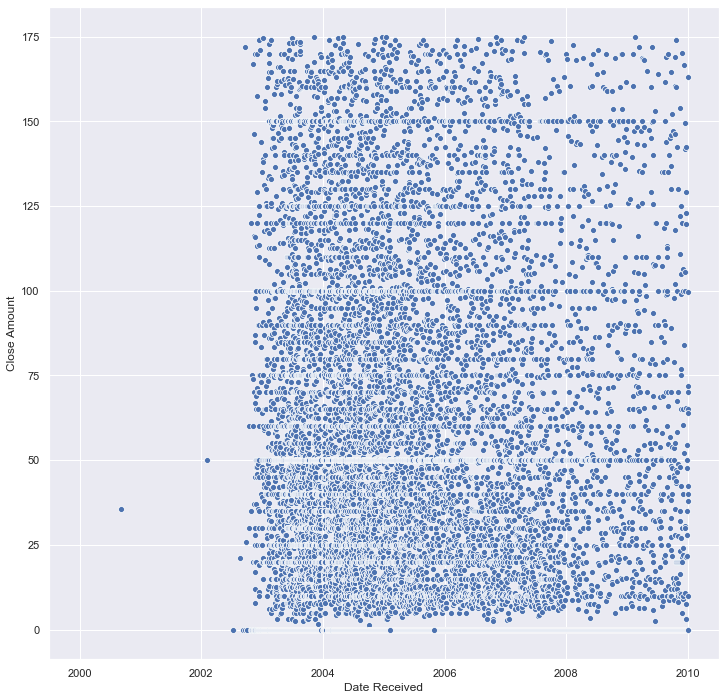

In [251]:
plt.figure(figsize=(12,12))

sns.scatterplot(data=tsa_clean[tsa_clean['Date Received']<date.today()].dropna(subset=['Close Amount']),x='Date Received',y='Close Amount')

In [252]:
IQR = tsa['Claim Amount'].describe()['75%']-tsa['Claim Amount'].describe()['25%']
LQ = tsa['Claim Amount'].describe()['25%']
UQ = tsa['Claim Amount'].describe()['75%']
LOutlier = LQ - 1.5*IQR
UOutlier = UQ + 1.5*IQR
tsa_clean = tsa[(tsa['Claim Amount']>LOutlier) & (tsa['Claim Amount']<UOutlier)]

C:\Users\chriz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.



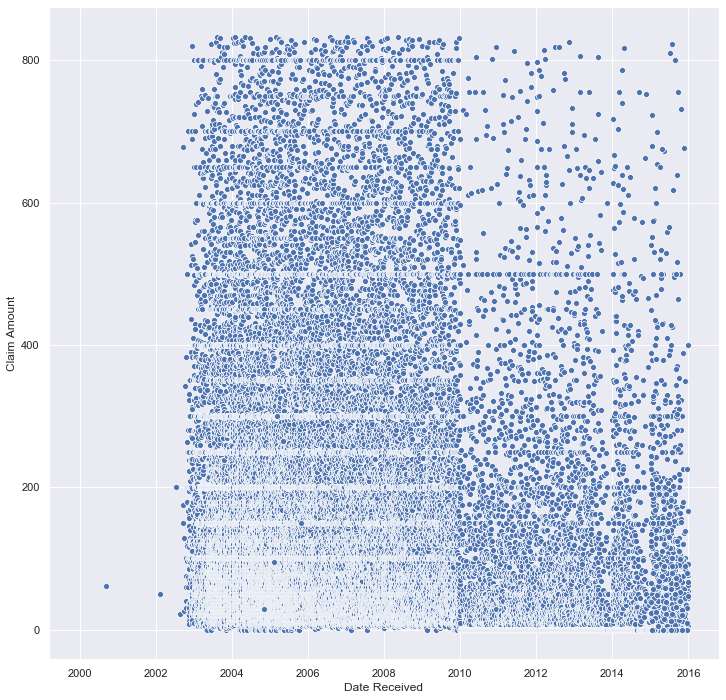

In [253]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=tsa_clean[tsa_clean['Date Received']<date.today()],x='Date Received',y='Claim Amount')

In [267]:
tsa[[i.year in range(2010,2016,1) for i in tsa['Date Received']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14816 entries, 36249 to 51065
Data columns (total 15 columns):
Claim Number          14816 non-null object
Date Received         14816 non-null datetime64[ns]
Incident Date         14816 non-null datetime64[ns]
Airport Code          14717 non-null object
Airport Name          14717 non-null object
Airline Name          13775 non-null object
Claim Type            14745 non-null object
Claim Site            14757 non-null object
Item                  13680 non-null object
Claim Amount          11628 non-null float64
Status                11628 non-null object
Close Amount          0 non-null float64
Disposition           0 non-null object
Day Differences       14816 non-null float64
Amount Differences    0 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 1.8+ MB


In [268]:
tsa[[i.year in range(2004,2010,1) for i in tsa['Date Received']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30308 entries, 5868 to 36248
Data columns (total 15 columns):
Claim Number          30308 non-null object
Date Received         30308 non-null datetime64[ns]
Incident Date         30153 non-null datetime64[ns]
Airport Code          29475 non-null object
Airport Name          29475 non-null object
Airline Name          24633 non-null object
Claim Type            29503 non-null object
Claim Site            30149 non-null object
Item                  29343 non-null object
Claim Amount          29797 non-null float64
Status                30308 non-null object
Close Amount          28641 non-null float64
Disposition           27801 non-null object
Day Differences       30153 non-null float64
Amount Differences    28560 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 3.7+ MB


In [272]:
tsa[[i.year in range(2010,2016,1) for i in tsa['Date Received']]].groupby('Status').count()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Close Amount,Disposition,Day Differences,Amount Differences
Status,,,,,,,,,,,,,,
Approve in Full,3165,3165,3165,3165,3165,2886,3161,3164,2918,3165,0,0,3165,0
Deny,7010,7010,7010,7010,7010,6682,6999,6998,6643,7010,0,0,7010,0
Settle,1453,1453,1453,1453,1453,1343,1448,1453,1385,1453,0,0,1453,0


## It appears that starting from 2011 there is a massive decrease in the claims application, the number of claims that is submitted from the year 2004 to 2010(30308 claims) is double in comparison to the number of cliams that is submitted from the year 2010 to 2016(14816). Out of the 14816 claims none of them have been given the closing amount or the disposition, however the status indicated that half of the claims have been either been approved or settle. These missing data might be due to a change in the TSA rules regarding giving out information on the exact close amount OR someone screwed up the TSA database/only this dataset.